In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
# other packages 
import matplotlib.pyplot as plt

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# for data processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for Linear regression model & gradient Boosting
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# for CART Feature Importance & decision Tree

# for random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [3]:
car_df = pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')

In [4]:
car_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


# Remove Unessary Columns

In [5]:
# drop all columns that are irrelavant to linear model 
# choosen through human Intuition 
unneeded_columns = ['id','url','region_url','image_url','description','posting_date','lat','long','county']

car_df = car_df.drop(unneeded_columns, axis=1)

# Remove Null Values

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [7]:
# Check if Data is fully numerical

car_df.isna().sum().sum()



1215152

# Find and Remove Outliers

In [8]:
# Box. plot function 
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

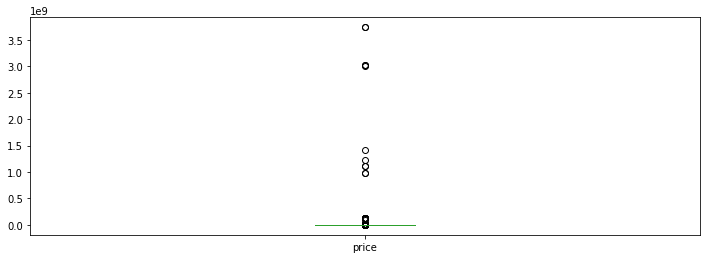

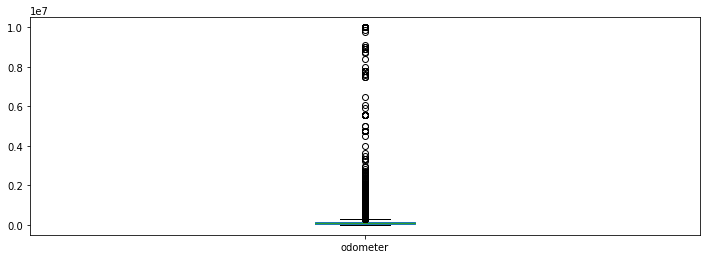

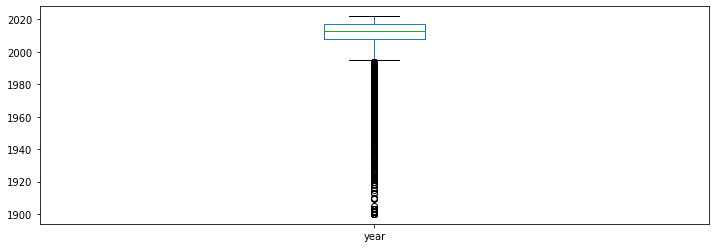

In [9]:
plot_boxplot(car_df,'price')
plot_boxplot(car_df,'odometer')
plot_boxplot(car_df,'year')

In [10]:
# find Extreme Values for price
# car_df = car_df[car_df.price < 500000]
pmin = 500
pmax = 70000
car_df = car_df[car_df['price'].between(pmin, pmax)]


In [11]:
# find Extreme Values for Year
# car_df = car_df[car_df.price < 500000]
year_min = 2000
year_max = 2022
car_df = car_df[car_df['year'].between(year_min, year_max)]



In [12]:
# find Extreme Values for odometer
# car_df = car_df[car_df.price < 500000]
odo_min = 1000
odo_max = 350000
car_df = car_df[car_df['odometer'].between(odo_min, odo_max)]

In [13]:
car_df.shape

(347507, 17)

In [14]:
car_df.describe()

,price,year,odometer
count,347507.000000,347507.000000,347507.000000
mean,19192.204813,2012.778876,93472.972001
std,13424.020584,5.020566,61044.560596
min,500.000000,2000.000000,1000.000000
25%,7995.000000,2009.000000,40495.500000
50%,15999.000000,2014.000000,88947.000000
75%,27990.000000,2017.000000,135362.000000
max,70000.000000,2022.000000,350000.000000


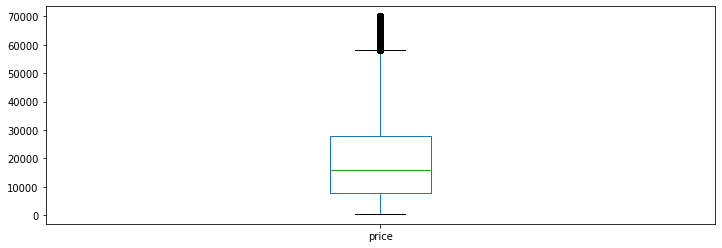

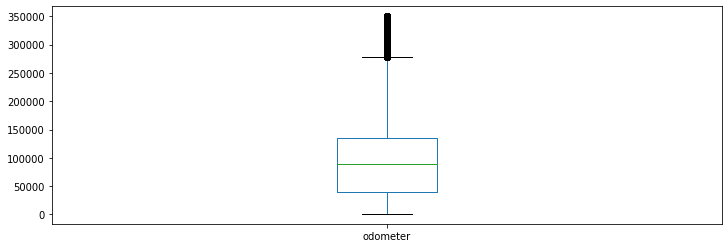

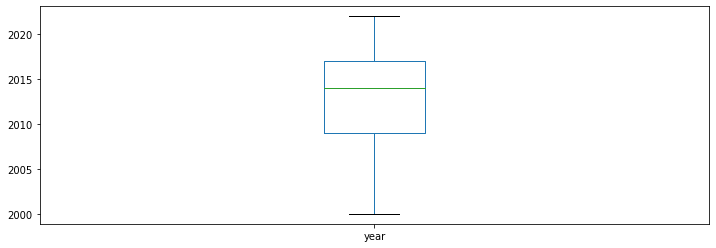

In [15]:
plot_boxplot(car_df,'price')
plot_boxplot(car_df,'odometer')
plot_boxplot(car_df,'year')

In [16]:
# Check if Data is fully numerical

car_df.isna().sum().sum()

car_df.isna().sum()

region               0
price                0
year                 0
manufacturer      9875
model             2677
condition       132517
cylinders       143741
fuel              2016
odometer             0
title_status      5917
transmission      1415
VIN             123708
drive           104630
size            252062
type             70283
paint_color      98468
state                0
dtype: int64

# Remove Outliers 

In [17]:
# Outliers Function 
cols = ['price', 'year', 'odometer'] # one or more

Q1 = car_df[cols].quantile(0.25)
Q3 = car_df[cols].quantile(0.75)
IQR = Q3 - Q1

car_df = car_df[~((car_df[cols] < (Q1 - 1.5 * IQR)) |(car_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
car_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [19]:
car_df.shape

(341618, 17)

In [20]:
car_df.describe()

,price,year,odometer
count,341618.000000,341618.000000,341618.000000
mean,18689.686108,2012.753119,93123.298348
std,12553.577508,4.995401,59429.797179
min,500.000000,2000.000000,1000.000000
25%,7995.000000,2009.000000,40884.000000
50%,15995.000000,2014.000000,89379.000000
75%,27590.000000,2017.000000,135168.000000
max,57981.000000,2022.000000,277542.000000


# Remove Null Values

# Clean Catagorical Variables

In [21]:
# Find Which columns have too many null values 
car_df.info()
car_df.isna().sum()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 341618 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        341618 non-null  object 
 1   price         341618 non-null  int64  
 2   year          341618 non-null  float64
 3   manufacturer  332123 non-null  object 
 4   model         339097 non-null  object 
 5   condition     212436 non-null  object 
 6   cylinders     200504 non-null  object 
 7   fuel          339621 non-null  object 
 8   odometer      341618 non-null  float64
 9   title_status  335743 non-null  object 
 10  transmission  340266 non-null  object 
 11  VIN           219842 non-null  object 
 12  drive         238345 non-null  object 
 13  size          94094 non-null   object 
 14  type          272737 non-null  object 
 15  paint_color   244823 non-null  object 
 16  state         341618 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usag

region               0
price                0
year                 0
manufacturer      9495
model             2521
condition       129182
cylinders       141114
fuel              1997
odometer             0
title_status      5875
transmission      1352
VIN             121776
drive           103273
size            247524
type             68881
paint_color      96795
state                0
dtype: int64

In [22]:
car_df.isna().mean()

region          0.000000
price           0.000000
year            0.000000
manufacturer    0.027794
model           0.007380
condition       0.378148
cylinders       0.413075
fuel            0.005846
odometer        0.000000
title_status    0.017198
transmission    0.003958
VIN             0.356468
drive           0.302305
size            0.724564
type            0.201632
paint_color     0.283343
state           0.000000
dtype: float64

In [23]:
# seperate columns with null values that have over 5% null
car_df.isna().mean()>0.15

region          False
price           False
year            False
manufacturer    False
model           False
condition        True
cylinders        True
fuel            False
odometer        False
title_status    False
transmission    False
VIN              True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

In [24]:
# Index of columns with null vlaues over 5%
car_df.columns[car_df.isna().mean() > 0.05]

Index(['condition', 'cylinders', 'VIN', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [25]:
# drop columns with null vlaues over 5% from the dataset  
high_null_count_columns = car_df.columns[car_df.isna().mean() > 0.05]
car_df = car_df.drop(high_null_count_columns, axis=1)

In [26]:
car_df.isna().mean()

region          0.000000
price           0.000000
year            0.000000
manufacturer    0.027794
model           0.007380
fuel            0.005846
odometer        0.000000
title_status    0.017198
transmission    0.003958
state           0.000000
dtype: float64

In [27]:
# clean catagorical data
# through one hot encoding
# or if too many unique values cut from dataset 


# Create a dictionary 

# how many unquie variable is each column
{column: len(car_df[column].unique()) for column in car_df.columns if car_df.dtypes[column] == 'object'}

{'region': 404,
 'manufacturer': 42,
 'model': 21471,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'state': 51}

In [28]:
# Drop model as too many unique values to one hot encode due to lack of memory allowance 
car_df = car_df.drop('model', axis=1)
car_df = car_df.drop('transmission', axis=1)
car_df = car_df.drop('state', axis=1)
car_df = car_df.drop('region', axis=1)
car_df = car_df.drop('manufacturer', axis=1)


In [29]:
# One hot encode function
def onehot_encode(df, columns, prefixes):
    df = df.copy()
#     pair into tuples 
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [30]:
car_df = onehot_encode(
    car_df,
    ['title_status','fuel'],
    ['title_status','fuel']
)

In [31]:
car_df.describe()

,price,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
count,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000,341618.000000
mean,18689.686108,2012.753119,93123.298348,0.949078,0.003729,0.000480,0.000184,0.019446,0.009885,0.055296,0.004285,0.845316,0.013550,0.075707
std,12553.577508,4.995401,59429.797179,0.219840,0.060954,0.021905,0.013579,0.138086,0.098932,0.228557,0.065323,0.361604,0.115614,0.264530
min,500.000000,2000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7995.000000,2009.000000,40884.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,15995.000000,2014.000000,89379.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,27590.000000,2017.000000,135168.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,57981.000000,2022.000000,277542.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
car_df.isna().mean()

price                      0.0
year                       0.0
odometer                   0.0
title_status_clean         0.0
title_status_lien          0.0
title_status_missing       0.0
title_status_parts only    0.0
title_status_rebuilt       0.0
title_status_salvage       0.0
fuel_diesel                0.0
fuel_electric              0.0
fuel_gas                   0.0
fuel_hybrid                0.0
fuel_other                 0.0
dtype: float64

# Data Split & Scalling

In [33]:
clean_df = car_df

In [34]:
# Data split 
y_orignial = clean_df.loc[:,'price']
X_orignial = clean_df.drop('price', axis=1)

In [35]:
X_orignial

,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,2014.0,57923.0,1,0,0,0,0,0,0,0,1,0,0
28,2010.0,71229.0,1,0,0,0,0,0,0,0,1,0,0
29,2020.0,19160.0,1,0,0,0,0,0,0,0,1,0,0
30,2017.0,41124.0,1,0,0,0,0,0,0,0,1,0,0
31,2013.0,128000.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,2019.0,32226.0,1,0,0,0,0,0,0,0,1,0,0
426876,2020.0,12029.0,1,0,0,0,0,0,0,0,1,0,0
426877,2020.0,4174.0,1,0,0,0,0,0,1,0,0,0,0
426878,2018.0,30112.0,1,0,0,0,0,0,0,0,1,0,0


In [36]:
# Data Scalling
scaler = StandardScaler()

X_orignial_scaled = scaler.fit_transform(X_orignial)



In [37]:
X_orignial_scaled

array([[ 0.24960616, -0.59230136,  0.23163461, ...,  0.42777356,
        -0.11720219, -0.28619651],
       [-0.55113153, -0.36840661,  0.23163461, ...,  0.42777356,
        -0.11720219, -0.28619651],
       [ 1.45071269, -1.24455088,  0.23163461, ...,  0.42777356,
        -0.11720219, -0.28619651],
       ...,
       [ 1.45071269, -1.49671432,  0.23163461, ..., -2.3376854 ,
        -0.11720219, -0.28619651],
       [ 1.05034384, -1.06026595,  0.23163461, ...,  0.42777356,
        -0.11720219, -0.28619651],
       [ 1.25052827, -1.18471549,  0.23163461, ...,  0.42777356,
        -0.11720219, -0.28619651]])

# Multiple Linear Regression Model 

In [38]:
# Train Test Split for Linear Regression 
X_train_LRM, X_test_LRM, y_train_LRM, y_test_LRM = train_test_split(X_orignial_scaled, y_orignial, train_size=0.7, random_state=740)

In [39]:
lin_model = LinearRegression()

lin_model.fit(X_train_LRM, y_train_LRM)

lin_Y_prediction = lin_model.predict(X_test_LRM)

In [40]:
lin_loss = np.sqrt(mean_squared_error(y_test_LRM, lin_Y_prediction))
print("Linear Regression RMSE:", lin_loss)
print("Linear Regression R^2 Score:", lin_model.score(X_test_LRM, y_test_LRM))

Linear Regression RMSE: 8583.065993685255
Linear Regression R^2 Score: 0.5373349371575002


Showing Feature importance

In [41]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train_LRM, y_train_LRM)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 5197.65469
Feature: 1, Score: -3992.56642
Feature: 2, Score: 664.43659
Feature: 3, Score: 199.21414
Feature: 4, Score: -81.04086
Feature: 5, Score: -60.17827
Feature: 6, Score: -500.62421
Feature: 7, Score: -363.62410
Feature: 8, Score: 3671.77125
Feature: 9, Score: -52.52176
Feature: 10, Score: -224.76428
Feature: 11, Score: -453.33087
Feature: 12, Score: 702.99401


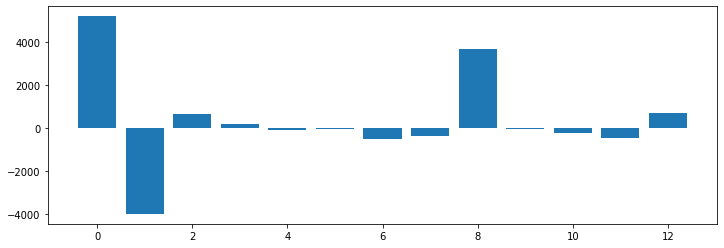

In [42]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Fine tune Multi Linear Regression by keeping 3 of the highest feature importance. 

- odometer
- fuel Types 
- transmisson types


# Fine Tuned Multi Linear Regression

In [43]:
X_orignial

,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,2014.0,57923.0,1,0,0,0,0,0,0,0,1,0,0
28,2010.0,71229.0,1,0,0,0,0,0,0,0,1,0,0
29,2020.0,19160.0,1,0,0,0,0,0,0,0,1,0,0
30,2017.0,41124.0,1,0,0,0,0,0,0,0,1,0,0
31,2013.0,128000.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,2019.0,32226.0,1,0,0,0,0,0,0,0,1,0,0
426876,2020.0,12029.0,1,0,0,0,0,0,0,0,1,0,0
426877,2020.0,4174.0,1,0,0,0,0,0,1,0,0,0,0
426878,2018.0,30112.0,1,0,0,0,0,0,0,0,1,0,0


In [44]:
# # X_Fine_tuned = X_orignial.drop((['fuel_electric', 'tititle_statustle_missing', 'tititle_statustle_parts only'], axis=1, inplace=True))
# # X_orignial.drop(['fuel_electric', 'tititle_statustle_missing'], axis=1)

# X_Fine_tuned = X_orignial.drop('fuel_electric', axis=1)
# X_Fine_tuned = X_orignial.drop('tititle_statustle_parts only', axis=1)
# X_Fine_tuned = X_orignial.drop('tititle_statustle_rebuilt', axis=1)
# X_Fine_tuned = X_orignial.drop('tititle_statustle_rebuilt', axis=1)
# X_Fine_tuned = X_orignial.drop('tititle_statustle_rebuilt', axis=1)
# X_Fine_tuned = X_orignial.drop('tititle_statustle_rebuilt', axis=1)

In [45]:
# X_Fine_tuned

In [46]:
# # Data Scalling
# scaler = StandardScaler()

# X_Fine_tuned = scaler.fit_transform(X_Fine_tuned)

In [47]:
# # Train Test Split for Fined Tuned Linear Regression
# X_train_LRM, X_test_LRM, y_train_LRM, y_test_LRM = train_test_split(X_Fine_tuned, y_orignial, train_size=0.7, random_state=740)

In [48]:
# lin_model = LinearRegression()

# lin_model.fit(X_train_LRM, y_train_LRM)

# lin_Y_prediction = lin_model.predict(X_test_LRM)

In [49]:
# lin_loss = np.sqrt(mean_squared_error(y_test_LRM, lin_Y_prediction))
# print("Linear Regression RMSE:", lin_loss)
# print("Linear Regression R^2 Score:", lin_model.score(X_test_LRM, y_test_LRM))

# Gradient Boosting Tree

In [50]:
clean_df

,price,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,33590,2014.0,57923.0,1,0,0,0,0,0,0,0,1,0,0
28,22590,2010.0,71229.0,1,0,0,0,0,0,0,0,1,0,0
29,39590,2020.0,19160.0,1,0,0,0,0,0,0,0,1,0,0
30,30990,2017.0,41124.0,1,0,0,0,0,0,0,0,1,0,0
31,15000,2013.0,128000.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,32226.0,1,0,0,0,0,0,0,0,1,0,0
426876,30590,2020.0,12029.0,1,0,0,0,0,0,0,0,1,0,0
426877,34990,2020.0,4174.0,1,0,0,0,0,0,1,0,0,0,0
426878,28990,2018.0,30112.0,1,0,0,0,0,0,0,0,1,0,0


In [51]:
# Train Test Split for Linear Regression 
X_train, X_test, y_train, y_test = train_test_split(X_orignial_scaled, y_orignial, train_size=0.7, random_state=740)

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Simple Gradient Boosting Model

In [53]:
# Gradient boosting Regressor model 
gradientregressor = GradientBoostingRegressor(max_depth=2,
                                             n_estimators=3,
                                             learning_rate=1.0)

In [54]:
# training Model
model = gradientregressor.fit(X_train,y_train)

In [55]:
# prediction 
y_pred = model.predict(X_test)

In [56]:
r2_score(y_pred,y_test)

0.19144910852723074

In [57]:
# # visualise 

# # plot feature importance 
# feature_importance = model.feature_importances_

# feature_importance = 100 * (feature_importance /feature_importance.max())

# Tune Hyperparameters 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Tune the learing rate And 
LR = {'learning_rate':[0.5], 'n_estimators':[80,95,100,105]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')

In [60]:
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.5, 'n_estimators': 105}, 0.5995200586396644)

In [61]:
# Tune the learing rate And 
LR = {'learning_rate':[0.5,0.2], 'n_estimators':[80,200,250,300]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.5, 'n_estimators': 300}, 0.6212622608492561)

In [62]:
# Tune the learing rate And 
LR = {'learning_rate':[0.5,0.2], 'n_estimators':[300,400,500,600]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.5, 'n_estimators': 600}, 0.642177580034177)

In [63]:
# from the tunning above its clear that the increase of estimators platuaes at 300 n estimators (number of tress)in r2 performace

In [64]:
# Tune the max depth 
LR = {'learning_rate':[0.5], 'n_estimators':[300], 'max_depth':[1,5,10,32]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 300},
 0.7179407914513748)

In [65]:
# # Tune the max depth 
# LR = {'learning_rate':[0.5], 'n_estimators':[300], 'max_depth':[10], 'min_samples_leaf':[0.1,0.5,1]}

# tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
# tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
# tuning.fit(X_train,y_train)
# tuning.best_params_, tuning.best_score_

# Final Gradient Boosted Regression Model

In [66]:
# Optimised version 
# Gradient boosting Regressor model 
gradientregressor = GradientBoostingRegressor(
                                             n_estimators=300,
                                             learning_rate=0.5,
                                             max_depth=10)

In [67]:
# training Model
model = gradientregressor.fit(X_train,y_train)

In [68]:
# prediction 
y_pred = model.predict(X_test)

In [69]:
r2_score(y_pred,y_test)

0.6457486755097039

In [70]:
# # instantiate a Decision Tree Regressor 
# dt = DecisionTreeRegressor(max_depth=4,
# #                          stopping condition 
#                            min_samples_leaf=0.1,
#                            random_state=740)
# 300,400,500,600

In [71]:
# # Fit model 
# dt.fit(X_train,y_train)

In [72]:
# # predict test labels
# y_predict = dt.predict(X_test)

In [73]:
# # calculate test MSE
# mse_dt = MSE(y_test, y_predict)


In [74]:

# # calculate rmse for fair comparison between other model 
# rmse_dt = mse_dt**(1/2)

# # Print RMSE
# print(rmse_dt)

In [75]:
# Gradient boosting Tress 
# Due to non linear relationship between y and xs i believe it will provide a more accurate prediction